# Исследование закономерностей, определяющих успех игр для интернет-магазина "Стримчик"

В нашем распоряжении исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В процессе ислледования мы должны выявить закономерности, определяющие успех игр в интернет-магазине. Для этого мы проведем обзор данных, подготовим данные для исследование и проведем само исследование.

В конце будет вывод, в котором собрана вся информация, извлеченная нами в процессе исследования.

## Обзор Данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
from scipy import stats as st
import numpy as np
import seaborn as sns

*Делаем обзор данных, для этого читаем таблицу и выводим на экран первые 10 строчек, чтоб иметь представление о таблице*

In [2]:
pd.set_option('display.max_columns', None)
games = pd.read_csv('/datasets/games.csv') #читаем таблицу

In [3]:
games.head(10) #выводим на экран первые 10 строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


*С помощью метода info() получаем информацию о количестве столбцов, строк и типах данных.*

In [4]:
games.info() #получаем информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*В таблице мы видим 11 столбцов и 16715 строк. В типах данных столбцов представлены строковые значения и значения с плавающей точкой.*

*Названия столбцов оформлены немного некорректно, требуется привести их к одному регистру. Типы данных в двух столбцах установлены неверно. Конкретно, в столбце год релиза и пользовательские оценки. Все это мы исправим далее, в разделе предобработка данных.*

## Предобработка данных

### Смена названий столбцов и проверка на наличие дубликатов

*После обзора данных сразу видно, что наименования столбцов требуется изменить на корректные, то есть привести все буквы к единому регистру.*

In [5]:
games.columns = games.columns.str.lower() #приводим названия к нижнему регистру

In [6]:
games.info() #проверяем изменения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
games.duplicated().sum() #проверка на наличие дубликатов

0

*Дубликатов не обнаружено*

### Типы данных

*Теперь пришло время изменить типы данных. Изменений требует столбец year_of_release на тип данных datetime и столбец user_score на тип данных float, так же. В столбце user_score есть аббревиатура tbd, она означет, что оценка еще не определена, поэтому при приведение к единому типу данных используем параметр errors = 'coerce', который принудительно изменит tbd на NaN, чтобы можно было полноценно использовать данные из столбца.*

In [8]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format = '%Y') #меняем типа данных года на корректный

In [9]:
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce') #меняем тип данных на корректный

In [10]:
games.info() #проверяем изменения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

In [11]:
games.isna().sum() #проверяем где именно есть пропуски

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

*Пропуски есть в шести столбцах. В стобце названия пропуски следует удалить, их всего два и без имени анализ данных из этих строк теряет смысл.*

*В столбце жанр два пропуска, их следует удалить.*

*В столбце с датой релиза 269 пропусков это не много, их так же удаляем, так как год один из параметров, который будет использоваться во время анализа, здесь его использовать не можем.*

*Оценки критиков и пользователей, рейтинг оставляем как есть, так как помимо оценок в каждой строке еще много важных параметров, а заменять средним некорректно.*

In [12]:
games = games.dropna(subset = ['name', 'year_of_release', 'genre']) #удаление строк с пустыми значениями

In [13]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

### Подсчет суммы продаж по каждому региону

*Данные привели впорядок, теперь создадим стобец с суммой продаж для каждой игры.*

In [14]:
games['all_sales'] = games[['na_sales', 'eu_sales','jp_sales','other_sales']].apply('sum', axis = 1).astype('float') #считаем сумму
games.head(10) #проверяем результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


## Исследовательский анализ данных

### Сколько игр выпускалось каждый год?

In [15]:
games_count_years = games.groupby('year_of_release')['name'].count() #выясняем количество игр, выпускаемых каждый год
games_count_years

year_of_release
1980-01-01       9
1981-01-01      46
1982-01-01      36
1983-01-01      17
1984-01-01      14
1985-01-01      14
1986-01-01      21
1987-01-01      16
1988-01-01      15
1989-01-01      17
1990-01-01      16
1991-01-01      41
1992-01-01      43
1993-01-01      60
1994-01-01     121
1995-01-01     219
1996-01-01     263
1997-01-01     289
1998-01-01     379
1999-01-01     338
2000-01-01     350
2001-01-01     482
2002-01-01     829
2003-01-01     775
2004-01-01     762
2005-01-01     939
2006-01-01    1006
2007-01-01    1197
2008-01-01    1427
2009-01-01    1426
2010-01-01    1255
2011-01-01    1136
2012-01-01     653
2013-01-01     544
2014-01-01     581
2015-01-01     606
2016-01-01     502
Name: name, dtype: int64

<AxesSubplot:xlabel='year_of_release'>

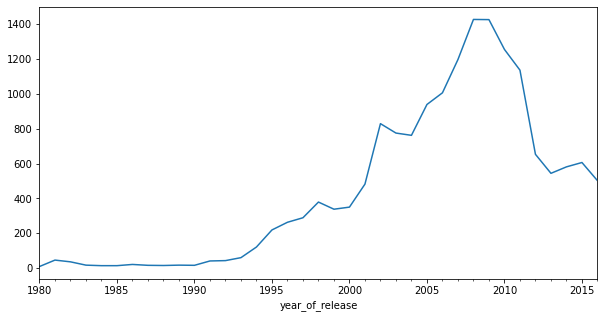

In [16]:
games_count_years.plot(figsize = (10,5)) #строим график для наглядности

*Если судить по цифрам и по графику, то самым урожайным на игры был период с 2005 по 2011 год. Но нам нужно выявить закономерности для планирования на 2017 год, то есть правильно будет взять данные за последние 5 лет, в этот период наблюдается сильный спад, выпускают около 50% от того, что производилось до 2012 года.*

<AxesSubplot:xlabel='platform'>

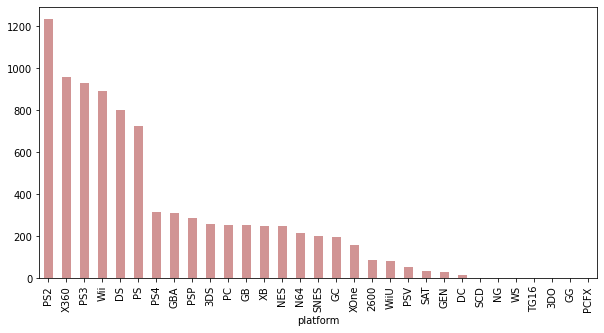

In [17]:
platform_sales=games.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
platform_sales.plot.bar(x='platform',y='all_sales',alpha=0.5,color='brown',figsize=(10,5))

<AxesSubplot:xlabel='platform', ylabel='year_of_release'>

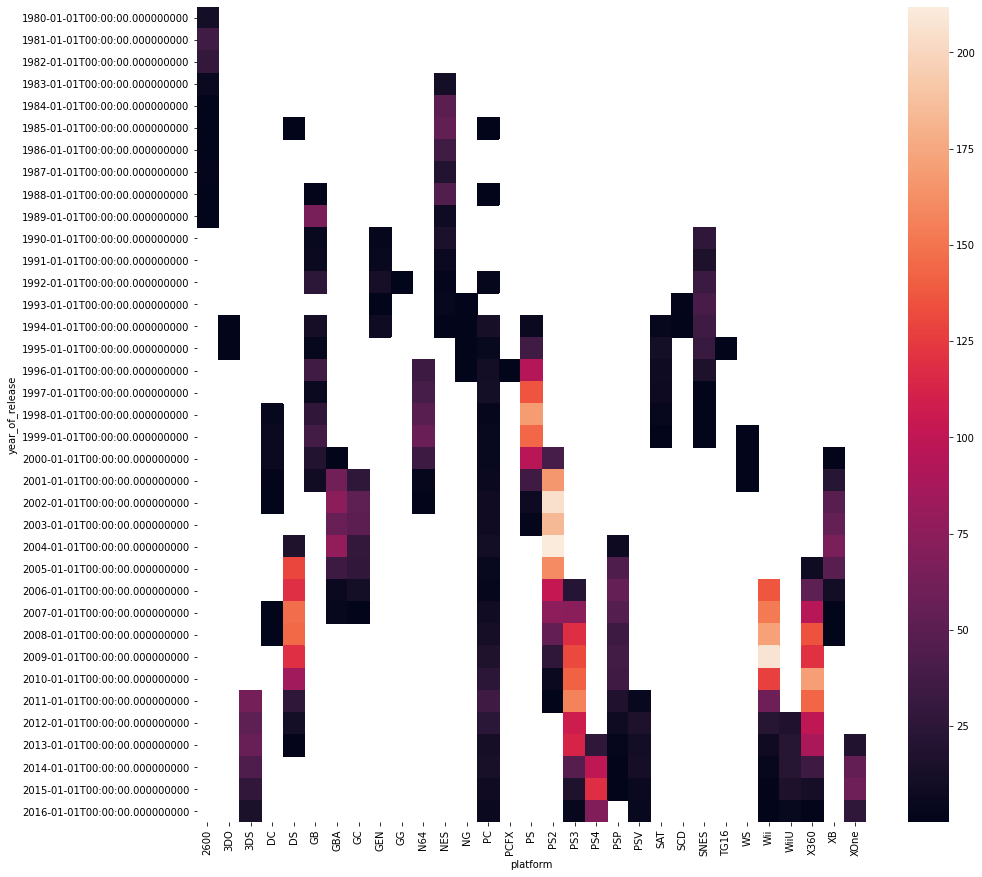

In [18]:
platform_sales = games.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum') #сводная таблица для выяснения распределения суммарных продаж по годам 
ax = plt.subplots(figsize=(15, 15)) #размеры тепловой карты
sns.heatmap(data=platform_sales) #тепловая карта

*Наибольшие суммарные продажи за весь период были у шести платформ, это видно на круговой диаграмме. По тепловой карте видно, что новые платформы возникают постоянно, а старые исчезают в среднем за восемь лет.*

### Исследование актуального периода с 2012 по 2016 год

*Для исследования берем данные за последние 3 года, изначально была мысль взять данные за последние 5 лет, но после построения тепловой карты стало ясно, что некоторые платформы, приносившие большие продажи уже не существуют с 2013,2012 года. А их показатели могли повлиять на ход исследования и привести к некорректным выводам.*

<!-- *Для исследования берем данные за последние 5 лет* -->

In [19]:
games = games.query('year_of_release > 2013') #берем срез данных за посоледние 5 лет и перезаписываем его, так как старый датафрейм больше не понадобится
games.reset_index(inplace = True)
games.head() #проверяем результат

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
3,77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,87,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


*Проверяем как вели себя платформы в этот период, выделяем несколько потенциально прибыльных платформ.*

In [20]:
games_actual = games.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum').fillna(0)
#Создаем сводную таблицу по году и продажам для платформ

<AxesSubplot:xlabel='platform', ylabel='year_of_release'>

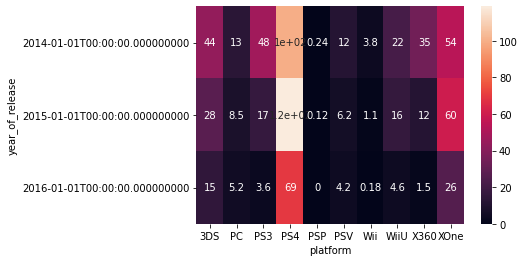

In [21]:
sns.heatmap(data=games_actual,annot=True) #тепловая карта

*С 2014 года все платформы показывают падение в продажах. Если падение продаж PS3, PSV и X360 очевидно вызвано выпуском PS4 и XOne, то как обяснить падение продаж у самих PS4 и Xone? Возможно это работа для социологов. Нам же надо выяснить для каких платформ, в дальнейшем будем называть их консолями, игры продаются успешней всего. И какие именно это игры.*

### Диаграмма размаха

(0.0, 2.0)

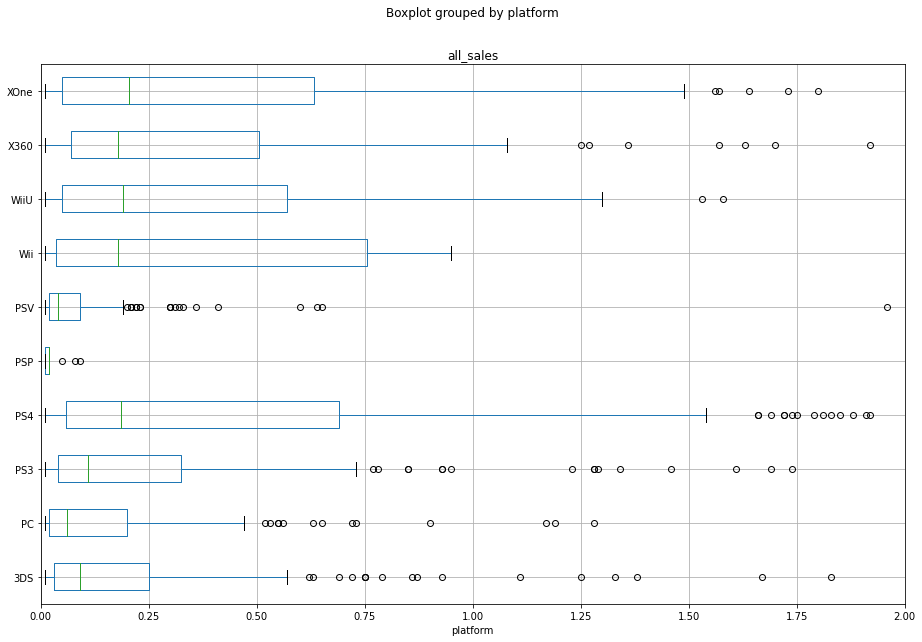

In [22]:
games.boxplot('all_sales',by='platform',vert=False,figsize=(15, 10))
plt.xlim(0,2)

*Выбросов, судя по графику нет. Самыми преуспевающими в продажах оказались консоли PS4, XOne, 3DS, X360 и PS3. Так же, судя по выбросам, самые продаваемые игры выходили на платформах, которые вошли в топ-5.*

### Изучаем оценки

*Проверим как влияют на продажи отзывы пользователей для консоли PS4*

-0.040131589472697356

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

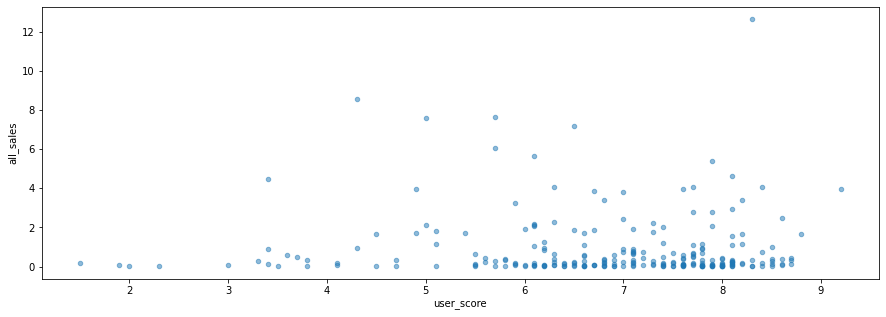

In [23]:
games_ps4 = games.query('platform == "PS4"') #получаем срез по консоли
display(games_ps4['user_score'].corr(games_ps4['all_sales'])) #расчет зависимости между отзывами пользователей и продажами
games_ps4.sort_values('user_score').plot(x='user_score', y='all_sales',kind='scatter',alpha=0.5,figsize=(15,5)) 

*Корреляции между отзывами пользователей и продажами для консоли PS4 нет, но по диаграмме понятно, что самые низкие продажи там, где отзывы меньше тройки.*

0.40266141068104083

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

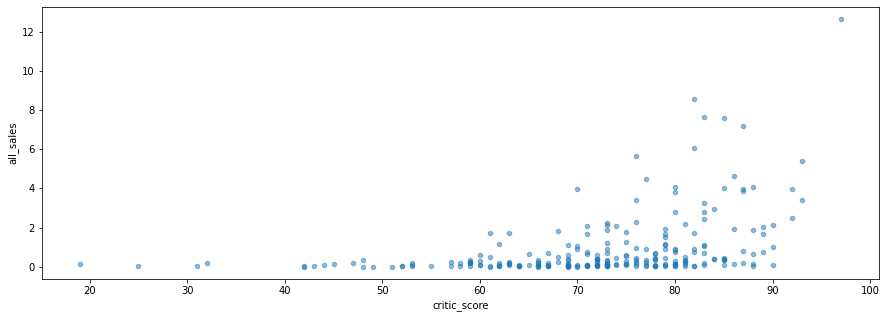

In [24]:
display(games_ps4['critic_score'].corr(games_ps4['all_sales'])) #расчет зависимости между отзывами критиков и продажами
games_ps4.sort_values('critic_score').plot(x='critic_score', y='all_sales',kind='scatter',alpha=0.5,figsize=(15,5)) 

*Корреляция между отзывами критиков и продажами есть, но она не такая значительная как можно было ожидать. По диаграмме видно, что самые низкие продажи при отзыве с рейтингом меньше 40.*

In [25]:
games_all = games.query('platform != "PS4"')
display(games_all['user_score'].corr(games_all['all_sales'])) #зависимость между отзывами пользователей и продажами для остальных консолей

-0.023478187237975554

In [26]:
display(games_all['critic_score'].corr(games_all['all_sales'])) #зависимость между отзывами пользователей и продажами для остальных консолей

0.3094740026001152

*Как и в случае с конкретной консолью, со всеми остальным зависимости между отзывами пользователей и продажами нет. Отзывы критиков тоже оказывают довольно низкое влияние на решении о покупке игры.*

### Распределение по жанрам

Text(0.5, 0, 'Жанры')

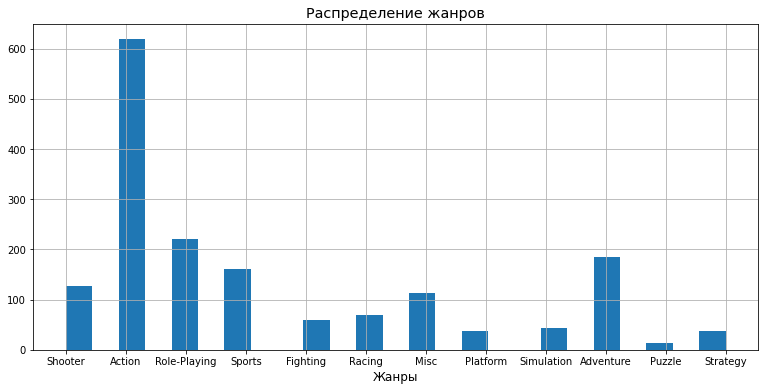

In [27]:
games['genre'].hist(bins=25,figsize=(13,6)) #гистограмма жанров
plt.title('Распределение жанров',fontsize='x-large')
plt.xlabel('Жанры',fontsize='large')

*Больше всего представлено игр для консолей в жанрах Action, Role-Playing, Adventur и Sports.*

In [28]:
games.groupby('genre')['all_sales'].sum().sort_values(ascending=False) #продажт по жанрама

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: all_sales, dtype: float64

Text(0, 0.5, 'Продажи')

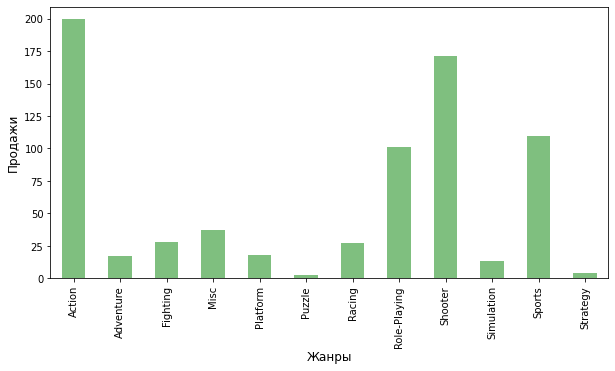

In [29]:
games.groupby('genre')['all_sales'].sum().plot.bar(x='genre',y='all_sales',alpha=0.5,color='green',figsize=(10,5)) #график продаж по жанрам
plt.xlabel('Жанры',fontsize='large')
plt.ylabel('Продажи',fontsize='large')

*Самыми прибыльными являются жанры Action, Shooter, Sports и Role-Playing. Adventur не входит в топ продаваемых, хотя игр в этом жанре больше, чем в Sports и Shooter*

## Портрет пользователя по регионам

### Самые популярные платформы по регионам

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
WiiU    19.36
PC       7.23
PSV      2.52
Wii      2.08
PSP      0.00
Name: na_sales, dtype: float64

Text(0, 0.5, 'Продажи в Северной Америке')

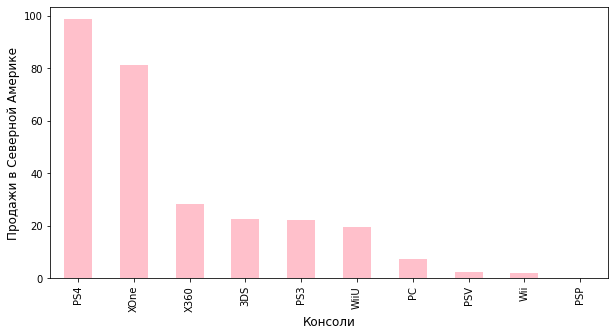

In [30]:
display(games.groupby('platform')['na_sales'].sum().sort_values(ascending=False)) #продажи по консолям для СА
games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot.bar(x='platform',y='na_sales',alpha=1,color='pink',figsize=(10,5))
# график продаж по консолям для СА
plt.xlabel('Консоли',fontsize='large')
plt.ylabel('Продажи в Северной Америке',fontsize='large')

In [31]:
games['na_sales'].sum() #сумма продаж для СА

284.06000000000006

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
X360     15.49
WiiU     13.15
PSV       3.53
Wii       2.59
PSP       0.00
Name: eu_sales, dtype: float64

Text(0, 0.5, 'Продажи в Европе')

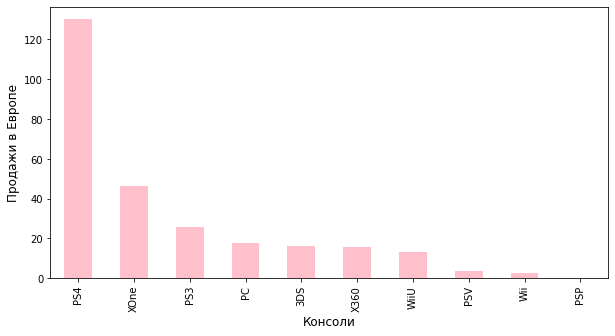

In [32]:
display(games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)) #продажи по консолям для Европы
games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot.bar(x='platform',y='eu_sales',alpha=1,color='pink',figsize=(10,5))
#график продаж по консолям для Европы
plt.xlabel('Консоли',fontsize='large')
plt.ylabel('Продажи в Европе',fontsize='large')

In [33]:
games['eu_sales'].sum() #Сумма продаж для Европы

270.67999999999995

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
PSP      0.36
XOne     0.32
X360     0.08
PC       0.00
Wii      0.00
Name: jp_sales, dtype: float64

Text(0, 0.5, 'Продажи в Японии')

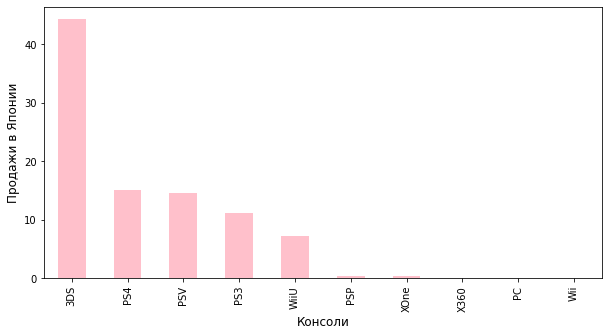

In [34]:
display(games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)) #продажи по консолям для Японии
games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot.bar(x='platform',y='jp_sales',alpha=1,color='pink',figsize=(10,5))
#график продаж по консолям для Японии
plt.xlabel('Консоли',fontsize='large')
plt.ylabel('Продажи в Японии',fontsize='large')

In [35]:
games['jp_sales'].sum() #сумма продаж для Японии

93.09

*Больше всего игр в Европе и Северной Америке продается для консолей PS4 XOne, дальше есть различия. В целом в Северной Америке и в Европе топ-5 отличается только одной позицией. В тоже время в Японии первое место занимает 3DS, а PS 4 только на втором, XOne вовсе не вошел в первую пятерку.*

*Если смотреть на суммы, то в Японии общие продажи ниже остальных. Это можно объяснить меньшем количеством населения в Японии, в отличии от Европы и Северной Америки. В тоже время, не смотря на то, что население Европы больше, чем в Северной Америке, общие продажи в Европе ниже на 5%. В Японии общие продажи ниже в 3 раза, скорее всего это так же связано с количеством людей, которые там проживают.*

### Самые популярные жанры по регионам

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Fighting        12.43
Racing           8.74
Platform         6.79
Adventure        5.64
Simulation       2.63
Strategy         0.98
Puzzle           0.65
Name: na_sales, dtype: float64

Text(0, 0.5, 'Продажи в Северной Америке')

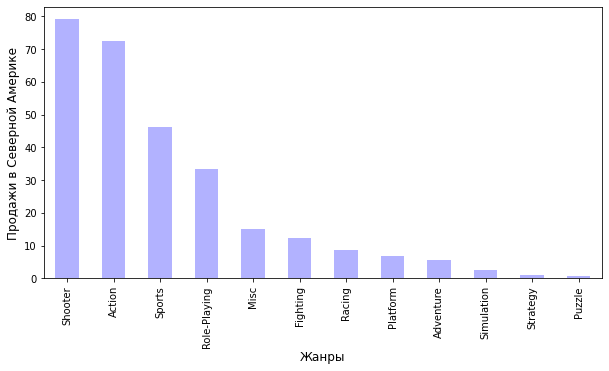

In [36]:
display(games.groupby('genre')['na_sales'].sum().sort_values(ascending=False)) #продажи по жанрам для СА
games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot.bar(x='genre',y='na_sales',alpha=0.3,color='blue',figsize=(10,5))
#график продаж по жанрам для СА
plt.xlabel('Жанры',fontsize='large')
plt.ylabel('Продажи в Северной Америке',fontsize='large')

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Misc            12.86
Simulation       7.30
Platform         6.80
Fighting         6.69
Adventure        6.49
Strategy         1.79
Puzzle           0.52
Name: eu_sales, dtype: float64

Text(0, 0.5, 'Продажи в Европе')

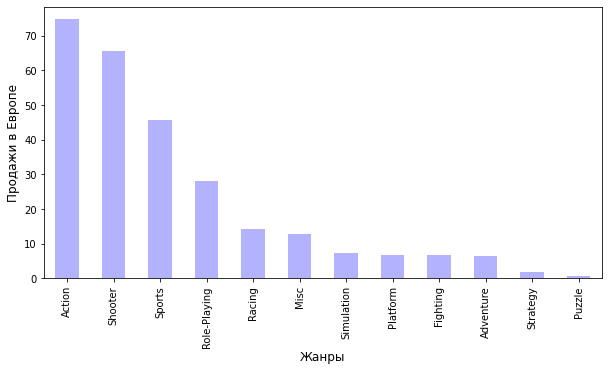

In [37]:
display(games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)) #продажи по жанрам для Европы
games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot.bar(x='genre',y='eu_sales',alpha=0.3,color='blue',figsize=(10,5))
#график продаж по жанрам для Европы
plt.xlabel('Жанры',fontsize='large')
plt.ylabel('Продажи в Европе',fontsize='large')

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Adventure        3.60
Sports           3.26
Platform         2.69
Simulation       2.31
Racing           1.76
Strategy         0.95
Puzzle           0.93
Name: jp_sales, dtype: float64

Text(0, 0.5, 'Продажи в Японии')

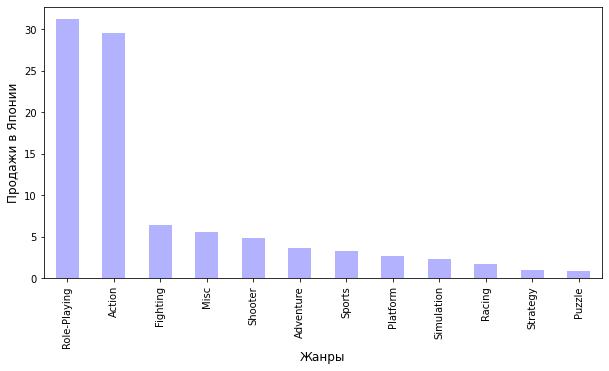

In [38]:
display(games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)) #продажи по жанрам для Японии
games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot.bar(x='genre',y='jp_sales',alpha=0.3,color='blue',figsize=(10,5))
#график продаж по жанрам для Японии
plt.xlabel('Жанры',fontsize='large')
plt.ylabel('Продажи в Японии',fontsize='large')

*Европа и Северная Америка в топ-5 жанров отличаются только жанром на 5 месте. 1 и 2 места занимают Action и Shooter, только в Европе Action на первом месте, а Shoter на втором, тогда как в Северной Америке наоборот. В Японии же покупателей больше привлекают Role-Playing и Action, Shooter хоть и входит в топ-5, но находится на последнем месте и довольно близко по продажам к жанру Sports, который на 6 месте.*

### Рейтинг ESRB

In [39]:
games['rating'] = games['rating'].fillna('tbd')

rating
M       96.42
tbd     64.72
E       50.74
T       38.95
E10+    33.23
Name: na_sales, dtype: float64

Text(0, 0.5, 'Продажи в Северной Америке')

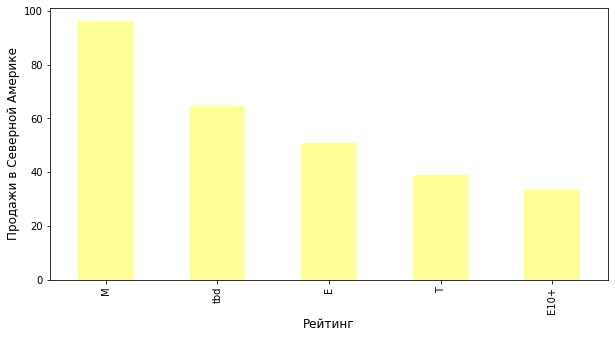

In [40]:
display(games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)) #продажи по рейтингу для СА
games.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot.bar(x='rating',y='na_sales',alpha=0.4,color='yellow',figsize=(10,5))
#график продаж по рейтингу для СА
plt.xlabel('Рейтинг',fontsize='large')
plt.ylabel('Продажи в Северной Америке',fontsize='large')

rating
M       93.44
tbd     58.95
E       58.06
T       34.07
E10+    26.16
Name: eu_sales, dtype: float64

Text(0, 0.5, 'Продажи в Европе')

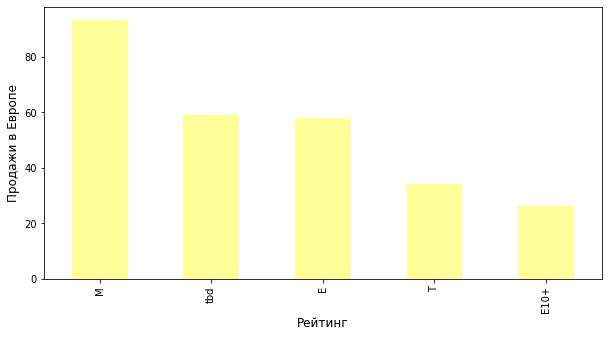

In [41]:
display(games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)) #продажи по рейтингу для Европы
games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot.bar(x='rating',y='eu_sales',alpha=0.4,color='yellow',figsize=(10,5))
#график продаж по рейтингу для Европы
plt.xlabel('Рейтинг',fontsize='large')
plt.ylabel('Продажи в Европе',fontsize='large')

rating
tbd     56.90
T       14.78
E        8.94
M        8.01
E10+     4.46
Name: jp_sales, dtype: float64

Text(0, 0.5, 'Продажи в Японии')

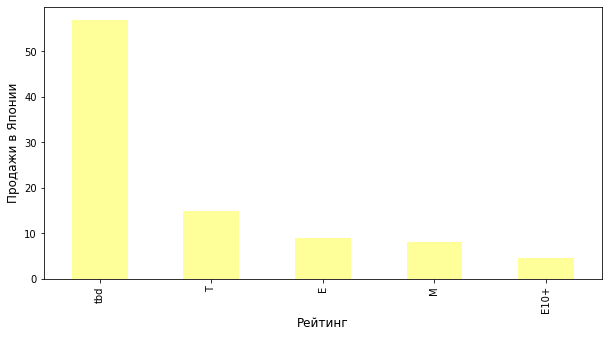

In [42]:
display(games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)) #продажи по рейтингу для Японии
games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot.bar(x='rating',y='jp_sales',alpha=0.4,color='yellow',figsize=(10,5))
#график продаж по рейтингу для Японии
plt.xlabel('Рейтинг',fontsize='large')
plt.ylabel('Продажи в Японии',fontsize='large')

*Рейтинги в Европе и Северной Америке расположились одинаково, на первом месте рейтинг M. В Японии же на первом месте рейтинг T. Можно сказать, что рейтинг влияет на продажи. По крайне мере в Японии охотней покупают игры, которые хоть и являются более реалистичными, но не переходят какие-либо грани, связанные с наркотиками, либо с откровенными сценами насилия. В Европе и Северной Америке наоборот охотней покупают игры с рейтингом серьезней. На втором месте рейтинг E, возможно это как раз игры категории спорт, симуляторы или детские игры.*

## Проверка гипотез

### Проверка гипотез о рейтингах консолей

*H₀ - Средний пользовательский рейтинг Xbox One = Среднему пользовательскому рейтингу PC;*
 
*H₁ - Средний пользовательский рейтинг Xbox One ≠ Среднему пользовательскому рейтингу PC;*

In [43]:
xbox = games.query('platform == "XOne" and not user_score.isna()')['user_score'] #срез данных для рейтинга пользователей xone
pc = games.query('platform == "PC" and not user_score.isna()')['user_score'] #срез данных для рейтинга пользователей pc
alpha = .01 #критический уровень статистической значимости
results = st.ttest_ind(xbox,pc,equal_var=False) #t-test для проверки гипотезы
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


### Проверка гипотез о рейтингах консолей

 *H₀ - Средний пользовательский рейтинг жанрa Action = Среднему пользовательскому рейтингу жанра Sports;*
 
 *H₁ - Средний пользовательский рейтинг жанрa Action ≠ Среднему пользовательскому рейтингу жанра Sports;*

In [44]:
action = games.query('genre == "Action" and not user_score.isna()')['user_score'] #срез данных для рейтинга пользователей жанра action
sports = games.query('genre == "Sports" and not user_score.isna()')['user_score'] #срез данных для рейтинга пользователей жанра sports
alpha = .01 #критический уровень статистической значимости
results = st.ttest_ind(action,sports,equal_var=False) #t-test для проверки гипотезы
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.1825550382644557e-14
Отвергаем нулевую гипотезу


### Пояснение о проверке гипотез

*Формулирование гипотез: Нулевая гипотеза уже была сформулирована в задании, она призывала определить одинаковы ли средние пользовательские рейтинги. Так как в нулевой гипотезе указано именно одинаковые, следует читать как равные, то альтернативная гипотеза формулируется как противоположность, то есть рейтинги неравные. Если бы в задании было указано требование определить больше ли средние рейтинги одной консоли, чем другой, то и альтернативная гипотеза звучала бы иначе.*

*Критерий для проверки гипотез: Был использован критерий Стьюдента, t-test в Python. Конкретно в этом случае был применен метод, который используется для отвержения, или же наоборот, гипотез о равенстве средних двух генеральных совокупностей.*

## Общий Вывод

- С 1991 года и до 2011 включительно количество выпускаемых игр ежегодно увеличивалось. После 2011 начался спад в производстве игр для консолей.
- Новые консоли возникают с разной периодичностью, тогда как жизнь старых в среднем составляет около 8 лет
- С 2014 года продажи игр для консолей упали.
- В топ-5 консолей по продажам входят:  PS4, XOne, 3DS, X360 и PS3
- Зависимости между продажами и отзывами пользователей нет, как для конкретной консоли, так и в общем для всех.
- Зависимость между продажами и отзывами критиков есть, но не слишком сильная, это касается всех консолей
- Больше остальных жанров, основную массу пользователей привлекает жанр Action и Shooter, это связано с тем, что эти жанры любят жители Северной Америки и Европы, что составляет более миллиарда людей. Тогда как в Японии отдают предпочтение ролевым играм, но там слишком мало жителей. Возможно исследование по Японии и в целом по Азии стоит проводить отдельно от Европы и Северной Америки. 